In [1]:
from ast import literal_eval
import urllib, json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


%matplotlib inline


# OPEN PV Data 

In [ ]:
import pprint

url = "https://developer.nrel.gov/api/solar/open_pv/installs/index?api_key=ROJZYfbyM45G3pDcZiEEBCL7gvOrtlvOOz1HBhu7"
response = requests.get(url)

print(response.text)

json_dct =response.json()

pprint.pprint(json_dct["result"])

In [ ]:
pd.DataFrame(json_dct["result"])

In [ ]:
openpv_NY = pd.read_csv('OpenPV_NY.csv')

In [ ]:
openpv_NY.head()

In [ ]:
openpv_NY.columns

In [ ]:
openpv_NY.describe()

In [ ]:
sum(openpv_NY['cost'].isnull())

In [ ]:
openpv_NY['date_installed'] = pd.datetools.to_datetime(openpv_NY['date_installed'])
openpv_NY.sort_values('date_installed', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

df = openpv_NY[openpv_NY['install_type']=='residential']
fig, ax = plt.subplots()

ax.plot(df['date_installed'], df['cost_per_watt'])

In [ ]:
openpv_NY['cost']= openpv_NY['cost'].convert_objects(convert_dates=False, convert_numeric=True, convert_timedeltas=True, copy=True)


In [ ]:
openpv_NY['cost'].mean()

In [ ]:
pd.pivot_table(openpv_NY, values="cost", index='install_type', columns='type')

In [ ]:
openpv_NY['install_type']=openpv_NY['install_type'].str.lower()
pd.pivot_table(openpv_NY, values="size_kw", index='install_type', columns='type', aggfunc=len)

In [ ]:
#Avg. size of installation per use 
pd.pivot_table(openpv_NY, values="size_kw", index='install_type', columns='type')

In [ ]:
#Cost per watt
pd.pivot_table(openpv_NY, values="cost_per_watt", index='install_type', columns='type')

# PV Watts Data

In [ ]:
url_pvwatts = 'https://developer.nrel.gov/api/pvwatts/v5.json?api_key=ROJZYfbyM45G3pDcZiEEBCL7gvOrtlvOOz1HBhu7&azimuth=180'

payload = "names=2012&leap_day=false&interval=60&utc=false&full_name=Honored%2BUser&email=honored.user%40gmail.com&affiliation=NREL&mailing_list=true&reason=Academic&attributes=dhi%2Cdni%2Cwind_speed_10m_nwp%2Csurface_air_temperature_nwp&wkt=MULTIPOINT(-106.22%2032.9741%2C-106.18%2032.9741%2C-106.1%2032.9741)"

headers = {
    'content-type': "application/x-www-form-urlencoded",
    'cache-control': "no-cache"
}

#response = requests.request("POST", url, data=payload, headers=headers)

response = requests.get(url_pvwatts)
print(response.text)

# Energy Survey Data

In [ ]:
energy_survey = pd.read_csv('energyconsupmtionsurvey.csv')

In [ ]:
energy_survey.head()

In [ ]:
plt.hist(energy_survey.SOLAR)

In [ ]:
plt.hist(energy_survey.MONEYPY)

In [ ]:
#Most of solar panel users are high income
pd.crosstab(energy_survey.SOLAR, energy_survey.MONEYPY)

In [ ]:
pd.crosstab(energy_survey.SOLAR, energy_survey.REGIONC)

# NY Low-Middle Income Communities

In [ ]:
NY = pd.read_csv('NYLowIncome.csv')

In [ ]:
len(NY['TRACT INDEX'].unique())

In [ ]:
NY.shape

In [ ]:
NY.shape

# Google Project Sunroof

In [4]:
google_sunroof=pd.read_csv('input/project-sunroof-google-08282017.csv')

In [5]:
google_sunroof.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,1001020100,Alabama,32.505161,32.449730,-86.475128,-86.510422,32.477184,-86.490082,1100.750000,549,...,5.311241e+05,2.877740e+06,1.996974e+06,2.243116e+06,2.383935e+06,11629.680078,1.003289e+07,"[[0,102],[5,186],[10,115],[15,62],[20,31],[25,...",5965.415459,0
1,1001020200,Alabama,32.489342,32.456120,-86.465378,-86.481270,32.474255,-86.473381,1100.750000,668,...,1.022209e+06,3.744571e+06,2.412537e+06,2.518632e+06,6.577281e+06,10710.713867,1.627523e+07,"[[0,152],[5,225],[10,136],[15,56],[20,21],[25,...",9677.025227,0
2,1001020300,Alabama,32.491909,32.459209,-86.450684,-86.470871,32.475426,-86.460190,1100.750000,1034,...,1.528836e+06,5.578409e+06,2.952972e+06,3.303605e+06,7.919555e+06,10554.883093,2.128338e+07,"[[0,245],[5,372],[10,231],[15,72],[20,25],[25,...",12654.799546,1
3,1001020400,Alabama,32.493690,32.447208,-86.432381,-86.453941,32.472000,-86.443619,1100.750000,1428,...,2.285756e+06,7.947657e+06,4.260433e+06,5.146429e+06,4.440952e+06,13055.584131,2.408123e+07,"[[0,244],[5,417],[10,371],[15,211],[20,100],[2...",14318.362881,0
4,1001020500,Alabama,32.485748,32.424000,-86.411346,-86.438423,32.458832,-86.422661,1100.751184,3275,...,4.593113e+06,2.253283e+07,1.226113e+07,1.450706e+07,1.394497e+07,13334.037469,6.783911e+07,"[[0,352],[5,1230],[10,905],[15,446],[20,120],[...",40336.188292,8


In [7]:
google_sunroof.shape

(48722, 31)

In [11]:
google_NY = google_sunroof[google_sunroof['state_name']=='New York']

In [12]:
google_NY.shape

(3789, 31)

In [13]:
google_NY.columns

Index([u'region_name', u'state_name', u'lat_max', u'lat_min', u'lng_max',
       u'lng_min', u'lat_avg', u'lng_avg',
       u'yearly_sunlight_kwh_kw_threshold_avg', u'count_qualified',
       u'percent_covered', u'percent_qualified', u'number_of_panels_n',
       u'number_of_panels_s', u'number_of_panels_e', u'number_of_panels_w',
       u'number_of_panels_f', u'number_of_panels_median',
       u'number_of_panels_total', u'kw_median', u'kw_total',
       u'yearly_sunlight_kwh_n', u'yearly_sunlight_kwh_s',
       u'yearly_sunlight_kwh_e', u'yearly_sunlight_kwh_w',
       u'yearly_sunlight_kwh_f', u'yearly_sunlight_kwh_median',
       u'yearly_sunlight_kwh_total', u'install_size_kw_buckets_json',
       u'carbon_offset_metric_tons', u'existing_installs_count'],
      dtype='object')

In [14]:
google_NY.region_name

29230    36001000100
29231    36001000200
29232    36001000300
29233    36001000401
29234    36001000403
29235    36001000404
29236    36001000501
29237    36001000502
29238    36001000600
29239    36001000700
29240    36001000800
29241    36001001100
29242    36001001400
29243    36001001500
29244    36001001600
29245    36001001700
29246    36001001801
29247    36001001802
29248    36001001901
29249    36001001902
29250    36001002000
29251    36001002100
29252    36001002200
29253    36001002300
29254    36001002500
29255    36001002600
29256    36001012700
29257    36001012800
29258    36001012900
29259    36001013000
            ...     
32989    36119013800
32990    36119013900
32991    36119014000
32992    36119014100
32993    36119014200
32994    36119014300
32995    36119014400
32996    36119014500
32997    36119014604
32998    36119014605
32999    36119014606
33000    36119014607
33001    36119014701
33002    36119014703
33003    36119014704
33004    36119014804
33005    3611

In [ ]:
np.mean(google_NY['count_qualified'])

In [ ]:
sum(google_NY['existing_installs_count'])

In [ ]:
google_NY['percent_qualified'].mean()

# NY Solar Installations

In [ ]:
serda_solar=pd.read_csv('Solar_Electric_Programs_Reported_by_NYSERDA__Beginning_2000.csv')

In [ ]:
serda_solar.shape

In [ ]:
serda_solar.columns = serda_solar.columns.str.replace('\s+', '_')
serda_solar.head().T

In [ ]:
serda_solar.columns

In [ ]:
serda_solar['Sector'].unique()

In [ ]:
np.mean(serda_solar['Total_Nameplate_kW_DC'])

In [ ]:
np.mean(serda_solar['Total_PV_Module_Quantity'])

In [ ]:
plt.plot(serda_solar.index, serda_solar['Total_PV_Module_Quantity'])

In [ ]:
serda_solar.Affordable_Solar.unique()

In [ ]:
sum(serda_solar.Affordable_Solar=='Yes')

In [ ]:
serda_solar['Project_Cost'] = serda_solar['Project_Cost'].str.replace('$', '')

serda_solar['Project_Cost'] = pd.to_numeric(serda_solar['Project_Cost'])

In [ ]:
serda_solar['Date_Completed'] = pd.datetools.to_datetime(serda_solar['Date_Completed'])
serda_solar.sort_values('Date_Completed', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
serda_solar['Cost_per_Kw'] =serda_solar['Project_Cost']/serda_solar['Total_Nameplate_kW_DC']
fig, ax = plt.subplots()

ax.scatter(serda_solar['Total_Nameplate_kW_DC'], serda_solar['Project_Cost'])
ax.set_xlim(0,3000)


In [ ]:
serda_solar1 = serda_solar['Location_1'].row.str.split('\n',).tolist(), columns = ['coutny','lat_lon']

In [ ]:
serda_solar1 = serda_solar['Location_1'].str.split(pat='\n', n=-1, expand=False)

In [ ]:
serda_solar['county'], serda_solar['lat_lon'], serda_solar['other'] = serda_solar['Location_1'].str.split(pat='\n', n=-1, expand=False).str

In [ ]:
serda_solar['lat_lon']

In [ ]:
serda_solar['lat'], serda_solar['lon'] = serda_solar['lat_lon'].str.split(pat=', ', n=-1, expand=False).str

In [ ]:
serda_solar['lat'] = serda_solar['lat'].map(lambda x: str(x)[1:])
serda_solar['lat']

In [ ]:
serda_solar['lon'] = serda_solar['lon'].map(lambda x: str(x)[:-1])
serda_solar['lon']

In [ ]:
serda_solar.to_csv('serda_solar.csv')

# Census Data

In [ ]:
import fiona

In [ ]:
ny_tracts = fiona.open('NYShapefiles/ny_tracts10/tl_2010_36_tract10.shp')

In [ ]:
data.meta

In [ ]:
lst= ['H0100001','H0110001','H0130002', 'P0020002','P0120001', 'P0160001','P0010001','P0030001']
var = ','.join(lst)
url_census = 'http://api.census.gov/data/2010/sf1?get={}&for=tract:*&in=state:33&key=ff3aee5f79063ffd4c2fa0b7912d2b83f974b2f8'.format(var)


In [ ]:
response = requests.get(url_census)
print(response.text)

In [ ]:
solar_tract = pd.read_csv('serda_tract.csv')

In [ ]:
solar_tract.head()

In [ ]:
solar_tract.columns

In [ ]:
solar_tract.describe()

In [ ]:
len(solar_tract.TRACTCE10.unique())

In [ ]:
solar_tract[solar_tract['COUNTYFP10']==1]

## American Community Survey 

In [36]:
lst = ['DP03_0062E','DP03_0051E', 'DP03_0051M', 'DP03_0051PE']
var = ','.join(lst)
url_income = 'http://api.census.gov/data/2015/acs5/profile?get={},NAME&for=tract:*&in=state:36&key=ff3aee5f79063ffd4c2fa0b7912d2b83f974b2f8'.format(var)

In [37]:
response = requests.get(url_income)
type(response.text)

unicode

In [38]:
request_content_list = literal_eval(response.text)

In [39]:
headers = request_content_list.pop(0)
acs_1115 = pd.DataFrame(request_content_list, columns=headers)
acs_1115.head()

,DP03_0062E,DP03_0051E,DP03_0051M,DP03_0051PE,NAME,state,county,tract
0,25179,815,73,815,"Census Tract 1, Albany County, New York",36,001,000100
1,26337,2006,228,2006,"Census Tract 2, Albany County, New York",36,001,000200
2,32244,2311,156,2311,"Census Tract 3, Albany County, New York",36,001,000300
3,72168,1037,82,1037,"Census Tract 4.01, Albany County, New York",36,001,000401
4,52857,2300,195,2300,"Census Tract 4.03, Albany County, New York",36,001,000403


In [40]:
acs_1115["GEOID10"] = acs_1115["state"].map(str) + acs_1115["county"].map(str) + acs_1115["tract"].map(str) 

In [17]:
acs_1115["GEOID10"].sort_values


<bound method Series.sort_values of 0       36001000100
1       36001000200
2       36001000300
3       36001000401
4       36001000403
5       36001000404
6       36001000501
7       36001000502
8       36001000600
9       36001000700
10      36001000800
11      36001001100
12      36001001400
13      36001001500
14      36001001600
15      36001001700
16      36001001801
17      36001001802
18      36001001901
19      36001001902
20      36001002000
21      36001002100
22      36001002200
23      36001002300
24      36001002500
25      36001002600
26      36001012700
27      36001012800
28      36001012900
29      36001013000
           ...     
4888    36119014809
4889    36119014810
4890    36119014811
4891    36119014901
4892    36119014903
4893    36119014907
4894    36119014908
4895    36119014909
4896    36119015000
4897    36119981000
4898    36119982000
4899    36119983000
4900    36119984000
4901    36119985000
4902    36121970100
4903    36121970200
4904    36121970300
4905

In [25]:
sum(acs_1115["GEOID10"]=='36005021100')

1

In [18]:
solar_instal["GEOID10"].sort_values

<bound method Series.sort_values of 0        36039081102
1        36039080201
2        36103158104
3        36091061800
4        36079010900
5        36111954400
6        36027050203
7        36093032402
8        36111952900
9        36103158112
10       36093021800
11       36111953700
12       36071010300
13       36039081102
14       36027221100
15       36027150004
16       36001013902
17       36071011102
18       36119013700
19       36079010500
20       36027150005
21       36027060400
22       36113070701
23       36111953700
24       36091062503
25       36039080300
26       36001013507
27       36113070701
28       36027170000
29       36059414800
            ...     
79040    36067004600
79041    36081052600
79042    36081084000
79043    36085020803
79044    36015010700
79045    36093021800
79046    36057070900
79047    36081089200
79048    36059518000
79049    36027210101
79050    36031960900
79051    36083052004
79052    36091061701
79053    36081055200
79054    3608501700

In [7]:
solar_instal = pd.read_csv('serda_tract.csv')

In [8]:
merged=solar_instal.merge(acs_1115, left_on='GEOID10', right_on='GEOID10', how='left')

In [41]:
result = pd.concat([solar_instal, acs_1115], axis=1)

In [42]:
result.head()

,X,Y,Index,Reporting_Period,Project_Number,City,County,State,Zip_Code,Sector,...,INTPTLON10,DP03_0062E,DP03_0051E,DP03_0051M,DP03_0051PE,NAME,state,county,tract,GEOID10
0,-73.914148,42.225955,0,7/31/17,4704-46572,Catskill,Greene,NY,12414,Residential,...,-73.916360,25179,815,73,815,"Census Tract 1, Albany County, New York",36,001,000100,36001000100
1,-74.031420,42.426414,1,7/31/17,4704-42684,Greenville,Greene,NY,12083,Residential,...,-74.014683,26337,2006,228,2006,"Census Tract 2, Albany County, New York",36,001,000200,36001000200
2,-73.081448,40.871411,2,7/31/17,4704-45656,Centereach,Suffolk,NY,11720,Residential,...,-73.080949,32244,2311,156,2311,"Census Tract 3, Albany County, New York",36,001,000300,36001000300
3,-73.854217,43.004269,3,7/31/17,4704-44415,Ballston Spa,Saratoga,NY,12020,Residential,...,-73.854458,72168,1037,82,1037,"Census Tract 4.01, Albany County, New York",36,001,000401,36001000401
4,-73.836873,41.385975,4,7/31/17,4704-46152,Putnam Valley,Putnam,NY,10579,Residential,...,-73.862046,52857,2300,195,2300,"Census Tract 4.03, Albany County, New York",36,001,000403,36001000403


(0, 50)

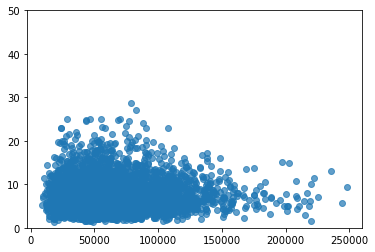

In [54]:
plt.scatter(result['DP03_0062E'], result['Total_Nameplate_kW_DC'],alpha=0.7)
plt.ylim(0,50)

In [160]:
merged.shape

(79070, 60)

In [162]:
acs_1115.shape

(4918, 8)

In [163]:
solar_instal.shape

(79070, 53)

In [156]:
acs_1115["GEOID10"].head()

0    36001000100
1    36001000200
2    36001000300
3    36001000401
4    36001000403
Name: GEOID10, dtype: object

In [158]:
solar_instal["GEOID10"].head()

0    36039081102
1    36039080201
2    36103158104
3    36091061800
4    36079010900
Name: GEOID10, dtype: int64

In [51]:
result['DP03_0062E'] = pd.to_numeric(result['DP03_0062E'], errors='coerce', downcast='float')

In [146]:
solar_instal.tract.value_counts()

017005    1030
027301     931
000800     799
011400     746
013400     689
124001     648
122902     642
112102     557
147200     555
020803     544
408900     526
521000     510
010300     486
014202     480
145604     479
014604     466
159102     438
950100     433
408200     432
190204     423
001600     402
080201     401
416600     400
122601     397
146613     395
002000     395
052004     394
414800     392
158104     392
158608     387
          ... 
099900       2
492400       2
962100       2
080104       2
190800       1
022800       1
024101       1
021402       1
013101       1
023801       1
029103       1
962000       1
962700       1
014208       1
980100       1
035700       1
490400       1
070500       1
011903       1
519300       1
015300       1
025003       1
009000       1
410000       1
124500       1
016500       1
021600       1
590600       1
014806       1
160003       1
Name: tract, Length: 918, dtype: int64

In [ ]:
for i in solar_instal['GEOID10']:
    for j in acs_1115['GEOID10']:
        if j==i:
            print i

In [ ]:
acs_1115['DP03_0051E'].head()

In [56]:
model = LinearRegression()

In [105]:
temp = result[['DP03_0062E', 'Total_Nameplate_kW_DC']]
temp.head()

,DP03_0062E,Total_Nameplate_kW_DC
0,25179.0,5.10
1,26337.0,10.50
2,32244.0,8.00
3,72168.0,3.57
4,52857.0,5.50


In [106]:
result1 = temp.dropna(axis=0, how='any')

In [75]:
result1.shape

(4918, 2)

In [76]:
np.mean(result1['Total_Nameplate_kW_DC'])

7.745433102887338

In [107]:
result1['DP03_0062E'] = pd.to_numeric(result1['DP03_0062E'], errors='coerce', downcast='float')

/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
result1['DP03_0062E'].dtype

dtype('float32')

In [109]:
X = result1['DP03_0062E'].reshape(-1, 1)

/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [110]:
y = result1['Total_Nameplate_kW_DC'].reshape(-1, 1)

/Users/mariamendieta/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [111]:
fitted = model.fit(X, y)

In [115]:
model.score(X,y)

3.4042594236893819e-06

In [169]:
(acs_1115.GEOID10.unique)

<bound method Series.unique of 0       36001000100
1       36001000200
2       36001000300
3       36001000401
4       36001000403
5       36001000404
6       36001000501
7       36001000502
8       36001000600
9       36001000700
10      36001000800
11      36001001100
12      36001001400
13      36001001500
14      36001001600
15      36001001700
16      36001001801
17      36001001802
18      36001001901
19      36001001902
20      36001002000
21      36001002100
22      36001002200
23      36001002300
24      36001002500
25      36001002600
26      36001012700
27      36001012800
28      36001012900
29      36001013000
           ...     
4888    36119014809
4889    36119014810
4890    36119014811
4891    36119014901
4892    36119014903
4893    36119014907
4894    36119014908
4895    36119014909
4896    36119015000
4897    36119981000
4898    36119982000
4899    36119983000
4900    36119984000
4901    36119985000
4902    36121970100
4903    36121970200
4904    36121970300
4905    3

<bound method Series.isnull of 0          4704-46572
1          4704-42684
2          4704-42684
3          4704-45656
4          4704-44415
5          4704-44415
6          4704-44415
7          4704-46152
8          4704-46152
9          4704-46152
10         4704-46152
11         4704-46152
12         4704-46473
13         4704-43944
14         4704-42781
15         4704-46571
16         4704-45932
17         4704-42179
18         4704-42179
19         4704-42179
20         4704-42179
21         4704-42179
22         4704-42567
23         4704-43949
24         4704-43949
25         4704-43949
26         4704-43949
27         4704-43949
28         4704-43949
29         4704-43949
             ...     
208712    5397-100564
208713    5397-100564
208714    5373-102236
208715     5407-88817
208716     5407-88817
208717     5407-88817
208718     5407-88817
208719     5407-88817
208720    5425-102755
208721    5425-102755
208722    5425-102755
208723    5425-102755
208724    5425-102642
2